In [5]:
# Import Kasthuri2015/em data using Intern. Next, import the relevant annotated data (mitochondria). Packages below should be helpful for completing the notebook. 
from intern import array
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [6]:
try: 
    from intern import array
except ImportError:
    print("Intern not installed on this kernel.")

dataset = array("bossdb://kasthuri2015/em/cc") #import Kasthuri 2015
mitochondriaDataset = array("bossdb://kasthuri2015/em/mitochondria") #import mitochondria dataset

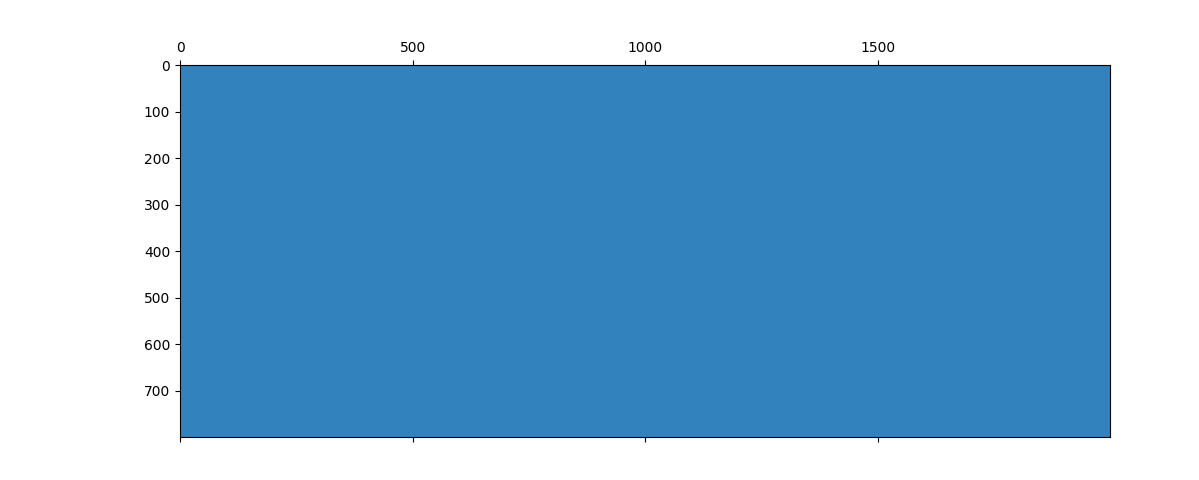

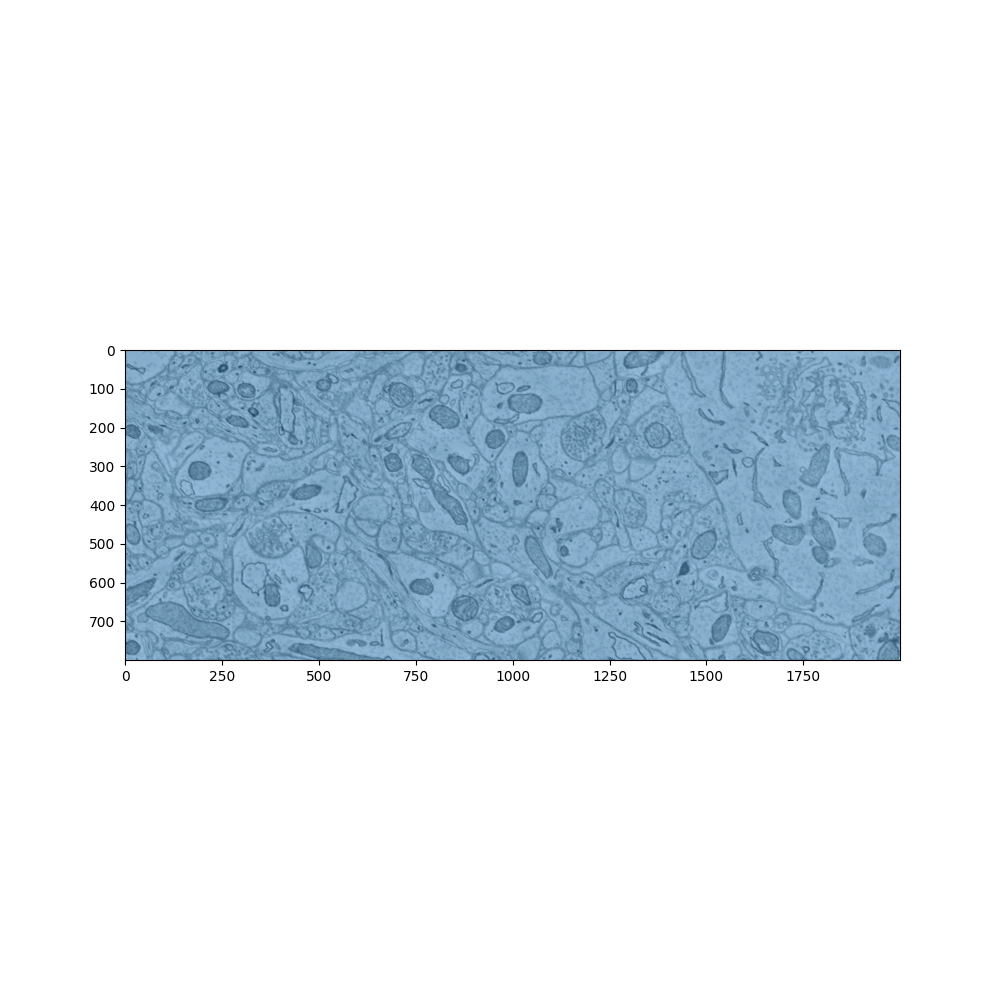

In [7]:
# Print the shape of the data and plot a slice with the annotation data superimposed to check 
# that things are aligned/the data sets are correct. 

em_segmentation = dataset[1012:1309, 8500:9300, 6000:8000]
mitochondria_segmentation = mitochondriaDataset[1012:1309, 8500:9300, 6000:8000]

plt.matshow(em_segmentation[0], cmap="Greys_r")
plt.imshow(mitochondria_segmentation[0], cmap="tab20c")
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(em_segmentation[0], cmap="Greys_r")
ax.imshow(mitochondria_segmentation[0], alpha=0.5, cmap="tab20c")

In [ ]:
### Start by accessing the values in a subregion. You can force your computer to freeze/restart if you try to go through the entire data, so the name of the game is working in chunks of data! 
### '0' value is background of the image. The below is sample code of how to manage the data locally, in case you need to work offline. 
### It is not necessary, but could be helpful to you! 

## Example of locally storing numpy array
# with open('backup.npy', 'wb') as f:
#     np.save(f, subregion)

## Example of accessing locally saved numpy array
# with open('backup.npy', 'rb') as f:
#     subregion = np.load(f)

In [ ]:
# CREATE SUBSET LIST (FUNCTION) (500 X 500)
# LOOP THROUGH SUBSETS
# OBTAIN A CHUNK OF DATA
# DETERMINE IF THERE IS A MITOCHONDRIA IN THAT PARTICULAR SUBSET (IN 3 DIMENSION)(TAG MITOCHONDRIA)
# INCREASE MITOCHONDRIA COUNTER

In [ ]:
def incrementMitochondria(u):
    uniqueArray = np.unique(u)
    mitochondriaCounter = 0
    for val in uniqueArray:
        if val != 0:
            mitochondriaCounter += 1              
    return mitochondriaCounter

In [27]:
isEmpty = False;
mitochondriaCounter = 0
xStart = 2681
yStart = 7019

while isEmpty != True:
    if yStart + 2 < 9945:
        mitochondria_seg = np.array(mitochondriaDataset[1012:1309, yStart: yStart + 2, 2681:7019])
        mitochondriaCounter += incrementMitochondria(mitochondria_seg)
        yStart += 400
        xStart += 600
    else:
        mictochondria_seg = np.array(mitochondriaDataset[1012:1309, yStart: 9945, xStart: 7109])
        mitochondriaCounter += incrementMitochondria(mictochondria_seg)
        isEmpty = True
            
print(mitochondriaCounter)

13


In [ ]:
# Pseudocode:
# Iterate through data set
# If there is non-zero in the mitochondria dataset, find the center of the mitochondria using OpenCV
# Store the center of the array in an array and run clustering on those points
# Go through array and increment for every mitochondria